In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

1. (b) **Monte-Carlo Simulation**: <br>
Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm

In [ ]:
data_path = "../data/wdbc.data"
name_path = "../data/wdbc.names"

data = pd.read_csv(data_path, header=None)
#data = data.iloc[:, 1:]
data.columns = ['id', 'label'] + ['feat%d'%i for i in range(1, data.shape[1] - 2 + 1)]
data.replace('M', 1, inplace=True)
data.replace('B', 0, inplace=True)

data

,id,label,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
def random_split(data, random_state, test_size=0.2):
    np.random.seed(random_state)
    
    # select 20% of malignant
    idx_positive, = np.where(data['label'] == 1)
    test_num_positive = round(len(idx_positive) * test_size)
    test_idx_positive = np.random.choice(idx_positive, test_num_positive, replace=False)
        
    # select 20% from benign samples
    idx_negative, = np.where(data['label'] == 0)
    test_num_negative = round(len(idx_negative) * test_size)
    test_idx_negative = np.random.choice(idx_negative, test_num_negative, replace=False)
    
    test_idx = np.concatenate([test_idx_negative, test_idx_positive])
    train_idx = np.array([i for i in range(data.shape[0]) if i not in test_idx])
    train_X = data.iloc[train_idx, 2:].copy()
    train_Y = data.iloc[train_idx, 1].copy()
    test_X = data.iloc[test_idx, 2:].copy()
    test_Y = data.iloc[test_idx, 1].copy()
    
    return train_X, train_Y, test_X, test_Y

In [ ]:
train_X, train_Y, test_X, test_Y = random_split(data, random_state=0)
train_X

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.1048,0.2250,0.08321
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637


In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc

result_summaries = {}
def normalize_data(train_X, test_X):
    scaler = Normalizer()
    train_X_normalized = scaler.fit_transform(train_X)
    test_X_normalized = scaler.transform(test_X)
    return train_X_normalized, test_X_normalized

def model_metrics(ground_truth, predict, prob, report):
    accuracy = report['accuracy']
    fpr, tpr, thresholds = roc_curve(ground_truth, prob, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    return {'accuracy' : accuracy, 'precision' : report['weighted avg']['precision'], 'recall' : report['weighted avg']['recall'], 'f1-score' : report['weighted avg']['f1-score'], 'auc' : roc_auc}

def model_summary(ground_truth, predict, prob, report, title):
    c_matrix = confusion_matrix(ground_truth, predict)
    print("Confusion Matrix for {} set: \n{}".format(title, c_matrix))
    accuracy = report['accuracy']
    print("Classification accuracy = %0.4f" % accuracy)
    fpr, tpr, thresholds = roc_curve(ground_truth, prob, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    axes.set_title("ROC curve({} set)".format(title))
    plt.show()

Attempt 1 ~ Train acc : 0.9803, Test acc : 0.9735
best parameter setting:
{'C': 14384.498882876629} 

Attempt 2 ~ Train acc : 0.9825, Test acc : 0.9646
best parameter setting:
{'C': 14384.498882876629} 

Attempt 3 ~ Train acc : 0.9868, Test acc : 0.9735
best parameter setting:
{'C': 42813.32398719387} 

Attempt 4 ~ Train acc : 0.9912, Test acc : 0.9735
best parameter setting:
{'C': 14384.498882876629} 

Attempt 5 ~ Train acc : 0.9803, Test acc : 0.9646
best parameter setting:
{'C': 4832.930238571752} 

Attempt 6 ~ Train acc : 0.9956, Test acc : 0.9558
best parameter setting:
{'C': 127427.49857031321} 

Attempt 7 ~ Train acc : 0.9912, Test acc : 0.9381
best parameter setting:
{'C': 1128837.8916846884} 

Attempt 8 ~ Train acc : 0.9781, Test acc : 0.9646
best parameter setting:
{'C': 42813.32398719387} 

Attempt 9 ~ Train acc : 0.9715, Test acc : 1.0000
best parameter setting:
{'C': 14384.498882876629} 

Attempt 10 ~ Train acc : 0.9868, Test acc : 0.9469
best parameter setting:
{'C': 1438

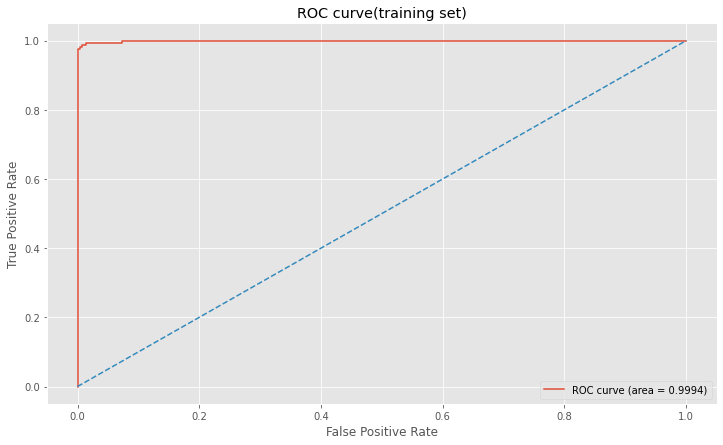

Confusion Matrix for test set: 
[[70  1]
 [ 1 41]]
Classification accuracy = 0.9823


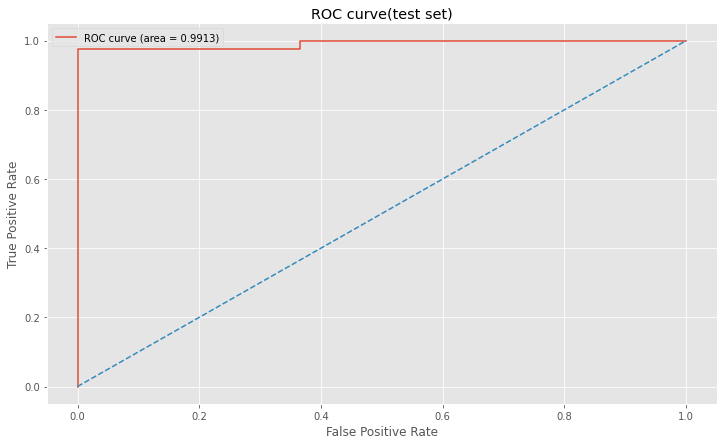


Average metrics summary
------------------------------------------------------------
          accuracy  precision    recall  f1-score       auc
training  0.985088   0.985131  0.985088  0.985063  0.998677
test      0.962832   0.963243  0.962832  0.962771  0.991070


In [ ]:
def supervised_svm(data, n):
    tuned_params = {'C' : np.logspace(-2, 7, 20)}
    params = {'param_grid' : tuned_params, 'scoring' : 'f1_weighted', 'n_jobs' : -1, 'verbose' : 0}
    
    train_summary = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])
    test_summary = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])
    
    for i in range(n):
        # randomly split data
        train_X, train_Y, test_X, test_Y = random_split(data, random_state=i)
        
        # normalize training/test data
        train_X, test_X = normalize_data(train_X, test_X)
        
        # create a data splitter for 5-fold cross-validation
        params['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
  
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **params)
        clf.fit(train_X, train_Y)

        train_pred_Y_prob = clf.decision_function(train_X)
        train_pred_Y = clf.predict(train_X)
        train_report = classification_report(train_Y, train_pred_Y, output_dict=True)
        train_res_temp = model_metrics(train_Y, train_pred_Y, train_pred_Y_prob, train_report)
        train_summary = train_summary.append(train_res_temp, ignore_index=True)
        test_pred_Y_prob = clf.decision_function(test_X)
        test_pred_Y = clf.predict(test_X)
        test_report = classification_report(test_Y, test_pred_Y, output_dict=True)
        test_res_temp = model_metrics(test_Y, test_pred_Y, test_pred_Y_prob, test_report)
        test_summary = test_summary.append(test_res_temp, ignore_index=True)
        
        print("Attempt {} ~ Train acc : {:.4f}, Test acc : {:.4f}".format(i+1, train_report['accuracy'], test_report['accuracy']))
        print("best parameter setting:")
        print(clf.best_params_, "\n")
    
    print('-' * 80)
    print('\n30th run of Monte-Carlo\n')
    
    model_summary(train_Y, train_pred_Y, train_pred_Y_prob, train_report, 'training')
    model_summary(test_Y, test_pred_Y, test_pred_Y_prob, test_report, 'test')
    
    # average metrics
    train_summary = train_summary.apply(lambda x: x.mean(), axis=0)
    test_summary = test_summary.apply(lambda x: x.mean(), axis=0)
    print('\nAverage metrics summary')
    print('-' * 60)
    summary = pd.concat([train_summary, test_summary], axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['training', 'test']))
    print(summary)
    return summary


result_summaries['Supervised'] = supervised_svm(data, 30)

ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation. <br>
B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [ ]:
def semi_supervised(train_X, train_Y, params):
    idx_labeled = []
    
    for c in [0, 1]:
        idx, = np.where(train_Y == c)
        idx_num = round(len(idx) * 0.5)
        select_idx = np.random.choice(idx, idx_num, replace=False)
        idx_labeled.extend(select_idx)
    
    idx_unlabeled = [i for i in range(len(train_X)) if i not in idx_labeled]
    
    X_labeled = train_X[idx_labeled].tolist()
    Y_labeled = train_Y.iloc[idx_labeled].tolist()  
    X_unlabeled = train_X[idx_unlabeled].tolist()
    Y_unlabeled = train_Y.iloc[idx_unlabeled].to_numpy().tolist()
 
    clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **params)
    clf.fit(X_labeled, Y_labeled)
    
    while len(X_unlabeled) > 0:
        scores = clf.decision_function(X_unlabeled)
        idx_sort = sorted([i for i in range(len(X_unlabeled))], key=lambda x : abs(scores[x]))
        X_unlabeled = [X_unlabeled[i] for i in idx_sort]
        Y_unlabeled = [Y_unlabeled[i] for i in idx_sort]
        
        # remove the farest point from unlabeled and add it to labeled
        X_labeled.append(X_unlabeled.pop())
        Y_labeled.append(Y_unlabeled.pop())

        clf.best_estimator_.fit(X_labeled, Y_labeled)
    
    return clf

In [ ]:
def semi_supervised_svm_mc(data, n):
    tuned_params = {'C' : np.logspace(-2, 7, 10)}  
    settings = {'param_grid' : tuned_params, 'scoring' : 'f1_weighted', 'n_jobs' : -1, 'verbose' : 0}
    
    train_summary = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])
    test_summary = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])
    
    for i in range(n):
        train_X, train_Y, test_X, test_Y = random_split(data, random_state=i, test_size=0.2)
        train_X, test_X = normalize_data(train_X, test_X)
        clf = semi_supervised(train_X, train_Y, settings)

        train_pred_Y_prob = clf.decision_function(train_X)
        train_pred_Y = clf.predict(train_X)
        train_report = classification_report(train_Y, train_pred_Y, output_dict=True)
        train_res_temp = model_metrics(train_Y, train_pred_Y, train_pred_Y_prob, train_report)
        train_summary = train_summary.append(train_res_temp, ignore_index=True)

        test_pred_Y_prob = clf.decision_function(test_X)
        test_pred_Y = clf.predict(test_X)
        test_report = classification_report(test_Y, test_pred_Y, output_dict=True)
        test_res_temp = model_metrics(test_Y, test_pred_Y, test_pred_Y_prob, test_report)
        test_summary = test_summary.append(test_res_temp, ignore_index=True)
        
        print("Attempt {} ~ Train acc : {:.4f}, Test acc : {:.4f}".format(i+1, train_report['accuracy'], test_report['accuracy']))
        print("best parameter setting:")
        print(clf.best_params_, "\n")
    
    print('-' * 80)
    print('\n30th run of Monte-Carlo\n')
 
    model_summary(train_Y, train_pred_Y, train_pred_Y_prob, train_report, 'training')
    model_summary(test_Y, test_pred_Y, test_pred_Y_prob, test_report, 'test')
    train_summary = train_summary.apply(lambda x: x.mean(), axis=0)
    test_summary = test_summary.apply(lambda x: x.mean(), axis=0)
    print('\nAverage metrics summary')
    print('-' * 60)
    summary = pd.concat([train_summary, test_summary], axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['training', 'test']))
    print(summary)
    return summary

Attempt 1 ~ Train acc : 0.9803, Test acc : 0.9735
best parameter setting:
{'C': 10000.0} 

Attempt 2 ~ Train acc : 0.9825, Test acc : 0.9558
best parameter setting:
{'C': 100000.0} 

Attempt 3 ~ Train acc : 0.9846, Test acc : 0.9735
best parameter setting:
{'C': 100000.0} 

Attempt 4 ~ Train acc : 0.9956, Test acc : 0.9646
best parameter setting:
{'C': 1000000.0} 

Attempt 5 ~ Train acc : 0.9825, Test acc : 0.9646
best parameter setting:
{'C': 10000.0} 

Attempt 6 ~ Train acc : 0.9956, Test acc : 0.9558
best parameter setting:
{'C': 100000.0} 

Attempt 7 ~ Train acc : 0.9890, Test acc : 0.9381
best parameter setting:
{'C': 100000.0} 

Attempt 8 ~ Train acc : 0.9759, Test acc : 0.9823
best parameter setting:
{'C': 10000.0} 

Attempt 9 ~ Train acc : 0.9671, Test acc : 0.9823
best parameter setting:
{'C': 1000.0} 

Attempt 10 ~ Train acc : 0.9868, Test acc : 0.9469
best parameter setting:
{'C': 10000.0} 

Attempt 11 ~ Train acc : 0.9649, Test acc : 0.9292
best parameter setting:
{'C': 100

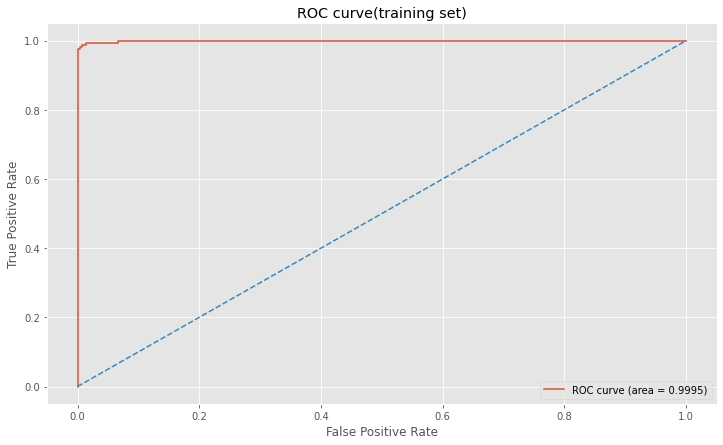

Confusion Matrix for test set: 
[[70  1]
 [ 1 41]]
Classification accuracy = 0.9823


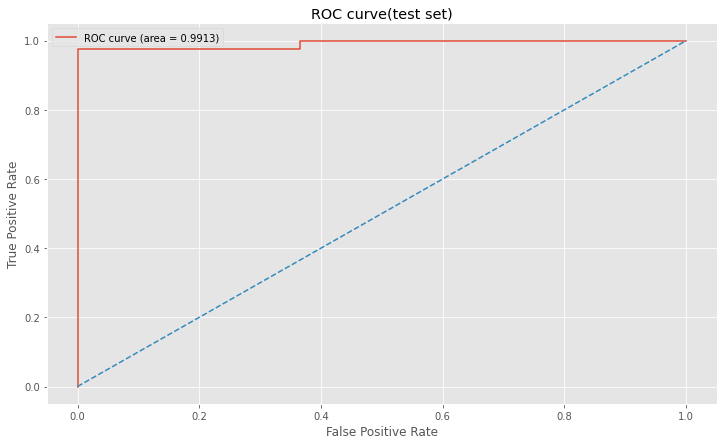


Average metrics summary
------------------------------------------------------------
          accuracy  precision    recall  f1-score       auc
training  0.983114   0.983140  0.983114  0.983093  0.998467
test      0.958702   0.959197  0.958702  0.958646  0.990897


In [ ]:
result_summaries['semi-supervised'] = semi_supervised_svm_mc(data, 30)

iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2. <br>
A. Run the k-means algorithm multiple times. Make sure that you initialize
the algoritm randomly. How do you make sure that the algorithm was
not trapped in a local minimum?

To make sure that the k-means algorithm was not trapped in a local minimum, we can set the number of iterations

B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the
labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs

In [ ]:
from scipy.special import softmax
from sklearn.cluster import KMeans

def get_distance(centers, X, cluster_label):
      dist = np.ndarray((X.shape[0],))
      prob = np.ndarray((X.shape[0], 2))
      for i, x in enumerate(X):
        center = centers[cluster_label[i]]
        dist[i] = np.linalg.norm(x - center)
        prob[i, 0] = np.linalg.norm(x - centers[0])
        prob[i, 1] = np.linalg.norm(x - centers[1])
      prob = softmax(prob, axis=1).astype(np.float64)
      return dist, prob


def get_majority(X, cluster_label, dist, Y):
    label = np.ndarray((2,), dtype='int')
    major_label = cluster_label.copy()
    for cluster in [0, 1]:
        sample_idx, = np.where(cluster_label == cluster)
        top_30 = sorted(sample_idx.tolist(), key=lambda i : dist[i])[:30]
        majority = Y.iloc[top_30].value_counts().index[0]
        major_label[sample_idx] = majority
        label[majority] = cluster
    return label, major_label


def k_means(data, n):
    train_summary = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])
    test_summary = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])
    for i in range(n):
        train_X, train_Y, test_X, test_Y = random_split(data, random_state=i, test_size=0.2)
        train_X, test_X = normalize_data(train_X, test_X)
        
        # create k-means clusters
        clusters = KMeans(n_clusters=2, n_init = 15, random_state=i).fit(train_X)

        train_cluster_label = clusters.predict(train_X)
        dist, train_pred_Y_prob = get_distance(clusters.cluster_centers_, train_X, train_cluster_label)
        label, train_pred_Y = get_majority(train_X, train_cluster_label, dist, train_Y)
        positive_cluster = label[0]
        train_pred_Y_prob = train_pred_Y_prob[:, positive_cluster]
        train_report = classification_report(train_Y, train_pred_Y, output_dict=True)
        train_res_temp = model_metrics(train_Y, train_pred_Y, train_pred_Y_prob, train_report)
        train_summary = train_summary.append(train_res_temp, ignore_index=True)

        test_cluster_label = clusters.predict(test_X)
        dist, test_pred_Y_prob = get_distance(clusters.cluster_centers_, test_X, test_cluster_label)
        label, test_pred_Y = get_majority(test_X, test_cluster_label, dist, test_Y)
        positive_cluster = label[0]
        test_pred_Y_prob = test_pred_Y_prob[:, positive_cluster]
        test_report = classification_report(test_Y, test_pred_Y, output_dict=True)
        test_res_temp = model_metrics(test_Y, test_pred_Y, test_pred_Y_prob, test_report)
        test_summary = test_summary.append(test_res_temp, ignore_index=True)
        print("Attempt {} ~ Train acc : {:.4f}, Test acc : {:.4f}".format(i+1, train_report['accuracy'], test_report['accuracy']))
    
    print('-' * 80)
    print('\n30th run:\n')
    model_summary(train_Y, train_pred_Y, train_pred_Y_prob, train_report, 'training')
    model_summary(test_Y, test_pred_Y, test_pred_Y_prob, test_report, 'test')

    train_summary = train_summary.apply(lambda x: x.mean(), axis=0)
    test_summary = test_summary.apply(lambda x: x.mean(), axis=0)
    print('\nAverage metrics summary:')
    print('-' * 60)
    summary = pd.concat([train_summary, test_summary], axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['training', 'test']))
    print(summary)
    return summary

Attempt 1 ~ Train acc : 0.8904, Test acc : 0.8496
Attempt 2 ~ Train acc : 0.8991, Test acc : 0.9027
Attempt 3 ~ Train acc : 0.8816, Test acc : 0.9115
Attempt 4 ~ Train acc : 0.8904, Test acc : 0.8496
Attempt 5 ~ Train acc : 0.8904, Test acc : 0.8850
Attempt 6 ~ Train acc : 0.8860, Test acc : 0.9027
Attempt 7 ~ Train acc : 0.8925, Test acc : 0.8761
Attempt 8 ~ Train acc : 0.8882, Test acc : 0.8938
Attempt 9 ~ Train acc : 0.8860, Test acc : 0.9027
Attempt 10 ~ Train acc : 0.8969, Test acc : 0.8496
Attempt 11 ~ Train acc : 0.8904, Test acc : 0.9204
Attempt 12 ~ Train acc : 0.8925, Test acc : 0.8850
Attempt 13 ~ Train acc : 0.8750, Test acc : 0.9292
Attempt 14 ~ Train acc : 0.8947, Test acc : 0.8407
Attempt 15 ~ Train acc : 0.8904, Test acc : 0.9115
Attempt 16 ~ Train acc : 0.8838, Test acc : 0.9027
Attempt 17 ~ Train acc : 0.8838, Test acc : 0.9027
Attempt 18 ~ Train acc : 0.8728, Test acc : 0.9469
Attempt 19 ~ Train acc : 0.8925, Test acc : 0.8673
Attempt 20 ~ Train acc : 0.8882, Test ac

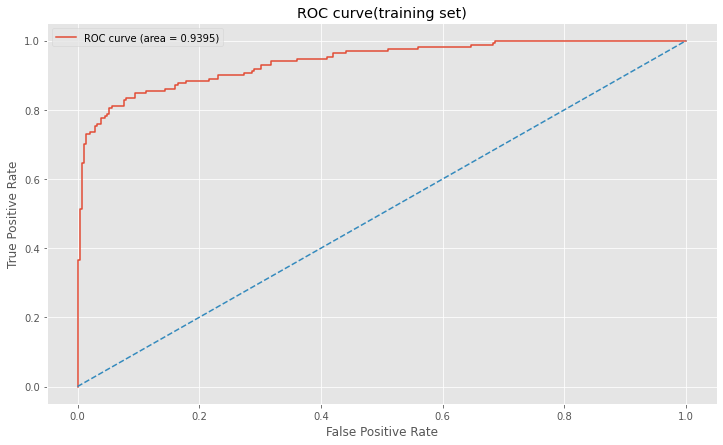

Confusion Matrix for test set: 
[[69  2]
 [11 31]]
Classification accuracy = 0.8850


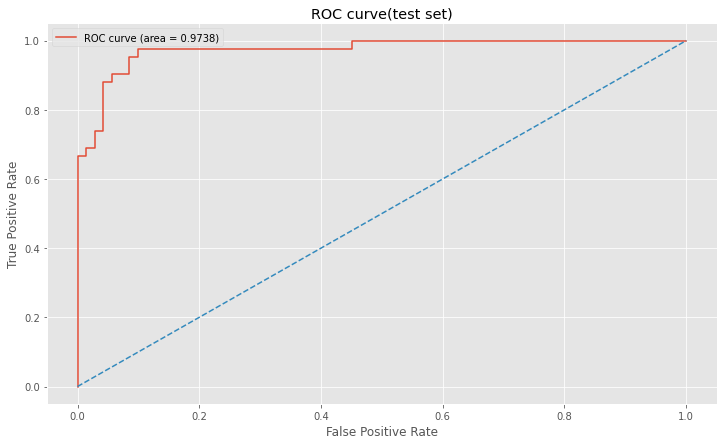


Average metrics summary:
------------------------------------------------------------
          accuracy  precision    recall  f1-score       auc
training  0.886257   0.895390  0.886257  0.882221  0.949770
test      0.891150   0.901128  0.891150  0.886880  0.951477


In [ ]:
result_summaries['Unsupervised-KMeans'] =k_means(data, 30)

iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral
clustering may give you non-convex clusters . Instead, use fit-predict method.

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

def spectral_clustering(data, n):
    train_summary = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])
    test_summary = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score', 'auc'])
    for i in range(n):
        train_X, train_Y, test_X, test_Y = random_split(data, random_state=i, test_size=0.2)
        train_X, test_X = normalize_data(train_X, test_X)
        #using the fit_predict method
        cluster_label = SpectralClustering(n_clusters=2, assign_labels='kmeans', affinity='rbf', eigen_tol = 1e-2, eigen_solver = 'arpack', random_state=0).fit_predict(train_X)
        cluster_centers = []
        for cluster in [0,1]:
            cluster_centers.append(np.mean(train_X[cluster_label==cluster], axis = 0).tolist())

        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(train_X, cluster_label)

        train_cluster_label = knn.predict(train_X)
        dist, train_pred_Y_prob = get_distance(cluster_centers, train_X, train_cluster_label)
        label, train_pred_Y = get_majority(train_X, train_cluster_label, dist, train_Y)  
        positive_cluster = label[0]
        train_pred_Y_prob = train_pred_Y_prob[:, positive_cluster]
        train_report = classification_report(train_Y, train_pred_Y, output_dict=True)
        train_res_temp = model_metrics(train_Y, train_pred_Y, train_pred_Y_prob, train_report)
        train_summary = train_summary.append(train_res_temp, ignore_index=True)

        test_cluster_label = knn.predict(test_X)
        dist, test_pred_Y_prob = get_distance(cluster_centers, test_X, test_cluster_label)
        label, test_pred_Y = get_majority(test_X, test_cluster_label, dist, test_Y)
        positive_cluster = label[0]
        test_pred_Y_prob = test_pred_Y_prob[:, positive_cluster]
        test_report = classification_report(test_Y, test_pred_Y, output_dict=True)
        test_res_temp = model_metrics(test_Y, test_pred_Y, test_pred_Y_prob, test_report)
        test_summary = test_summary.append(test_res_temp, ignore_index=True)
        
        print("Attempt {} ~ Train acc : {:.4f}, Test acc : {:.4f}".format(i+1, train_report['accuracy'], test_report['accuracy']))
    
    print('-' * 80)
    print('\n30th run\n')
    model_summary(train_Y, train_pred_Y, train_pred_Y_prob, train_report, 'training')
    model_summary(test_Y, test_pred_Y, test_pred_Y_prob, test_report, 'test')

    train_summary = train_summary.apply(lambda x: x.mean(), axis=0)
    test_summary = test_summary.apply(lambda x: x.mean(), axis=0)
    print('\nSummary of average metrics')
    print('-' * 60)
    summary = pd.concat([train_summary, test_summary], axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['training', 'test']))
    print(summary)
    return summary

Attempt 1 ~ Train acc : 0.8904, Test acc : 0.8584
Attempt 2 ~ Train acc : 0.8882, Test acc : 0.9027
Attempt 3 ~ Train acc : 0.8772, Test acc : 0.8761
Attempt 4 ~ Train acc : 0.8860, Test acc : 0.8230
Attempt 5 ~ Train acc : 0.8816, Test acc : 0.8850
Attempt 6 ~ Train acc : 0.8838, Test acc : 0.8673
Attempt 7 ~ Train acc : 0.8882, Test acc : 0.8584
Attempt 8 ~ Train acc : 0.8838, Test acc : 0.9027
Attempt 9 ~ Train acc : 0.8750, Test acc : 0.9027
Attempt 10 ~ Train acc : 0.8882, Test acc : 0.8230
Attempt 11 ~ Train acc : 0.8816, Test acc : 0.8938
Attempt 12 ~ Train acc : 0.8882, Test acc : 0.8673
Attempt 13 ~ Train acc : 0.8750, Test acc : 0.9115
Attempt 14 ~ Train acc : 0.8925, Test acc : 0.8142
Attempt 15 ~ Train acc : 0.8816, Test acc : 0.8761
Attempt 16 ~ Train acc : 0.8794, Test acc : 0.9027
Attempt 17 ~ Train acc : 0.8750, Test acc : 0.8938
Attempt 18 ~ Train acc : 0.8684, Test acc : 0.9292
Attempt 19 ~ Train acc : 0.8882, Test acc : 0.8673
Attempt 20 ~ Train acc : 0.8860, Test ac

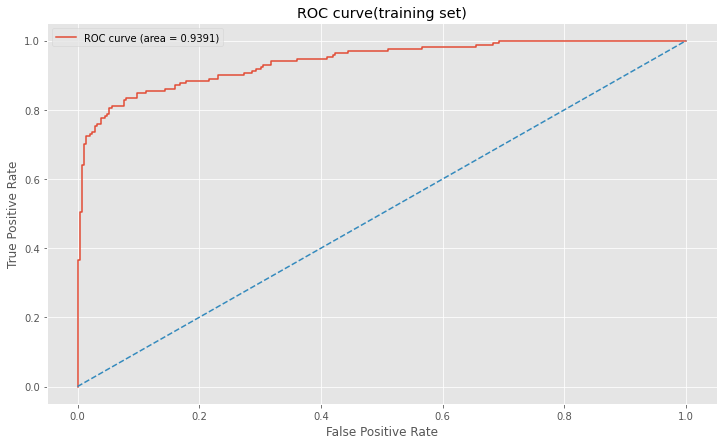

Confusion Matrix for test set: 
[[69  2]
 [11 31]]
Classification accuracy = 0.8850


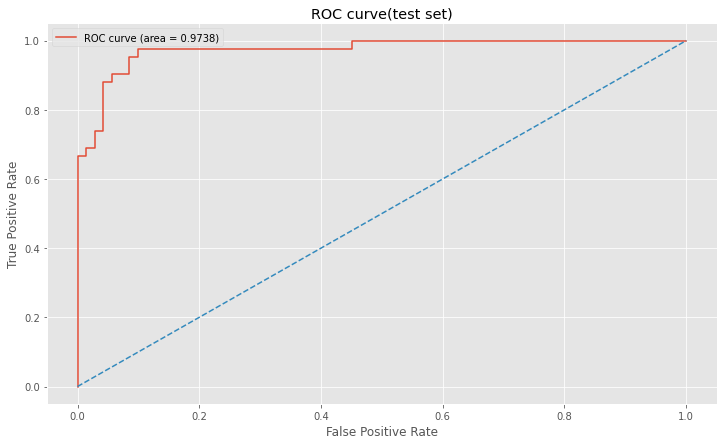


Summary of average metrics
------------------------------------------------------------
          accuracy  precision    recall  f1-score       auc
training  0.881725   0.891870  0.881725  0.877226  0.949187
test      0.879646   0.891289  0.879646  0.874297  0.951153


In [ ]:
result_summaries['Unsupervised - Spectral Clustering'] = spectral_clustering(data, 30)

v. Compare the results you obtained by those methods.

In [ ]:
for key in result_summaries.keys():
    print('\n' + '-' * 60)
    print(key)
    print(result_summaries[key])


------------------------------------------------------------
Supervised
          accuracy  precision    recall  f1-score       auc
training  0.985088   0.985131  0.985088  0.985063  0.998677
test      0.962832   0.963243  0.962832  0.962771  0.991070

------------------------------------------------------------
semi-supervised
          accuracy  precision    recall  f1-score       auc
training  0.983114   0.983140  0.983114  0.983093  0.998467
test      0.958702   0.959197  0.958702  0.958646  0.990897

------------------------------------------------------------
Unsupervised-KMeans
          accuracy  precision    recall  f1-score       auc
training  0.886257   0.895390  0.886257  0.882221  0.949770
test      0.891150   0.901128  0.891150  0.886880  0.951477

------------------------------------------------------------
Unsupervised - Spectral Clustering
          accuracy  precision    recall  f1-score       auc
training  0.881725   0.891870  0.881725  0.877226  0.949187
test      

2. Active Learning Using Support Vector Machines <br>
(a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
test_idx = np.random.choice(df.shape[0], 472, replace=False)
train_idx = np.array([i for i in range(df.shape[0]) if i not in test_idx])
train_data = df.iloc[train_idx]
test_data = df.iloc[test_idx]

In [ ]:
def passive_learning_acc(train_X, train_Y, test_X, test_Y, params):
    data_idx = np.arange(train_X.shape[0])
    used_idx = []
    accuracy_list = []
    
    while len(data_idx) > 0:
        np.random.shuffle(data_idx)
        samples, data_idx = data_idx[:10], data_idx[10:]
        used_idx.extend(samples)
             
        used_trainX, used_trainY = train_X[used_idx], train_Y.iloc[used_idx]
        
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **params)
        clf.fit(used_trainX, used_trainY)
        test_pred_Y = clf.predict(test_X)
        test_report = classification_report(test_Y, test_pred_Y, output_dict=True)
        accuracy_list.append(test_report['accuracy'])
    
    return accuracy_list

In [ ]:
def passive_learning(data, n):
    tuned_params = {'C' : np.logspace(-2, 7, 20)}
    params = {'param_grid' : tuned_params, 'scoring' : 'f1_weighted','n_jobs' : -1,'verbose' : 0}
    
    learning_curve = []   
    for i in range(n):
        test_idx = np.random.choice(df.shape[0], 472, replace=False)
        train_idx = np.array([i for i in range(df.shape[0]) if i not in test_idx])
        
        train_set, test_set = data.iloc[train_idx], data.iloc[test_idx]
        train_X, train_Y = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        test_X, test_Y = test_set.iloc[:, :-1], test_set.iloc[:, -1]

        train_X, test_X = normalize_data(train_X, test_X)
        #5-fold cross-validation
        params['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)

        accuracy_list = passive_learning_acc(train_X, train_Y, test_X, test_Y, params)
        learning_curve.append(accuracy_list)
        print("Attempt {} ~ Test acc with 10 samples: {:.4f}, Test acc with 900 samples: {:.4f}".format(i+1, accuracy_list[0], accuracy_list[-1]))
    
    learning_curve = np.array(learning_curve)
    learning_curve = np.mean(learning_curve, axis=0)
    return learning_curve

In [ ]:
#run this twice if it fails
passive_learning_curve = passive_learning(df, 50)

Attempt 1 ~ Test acc with 10 samples: 0.9597, Test acc with 900 samples: 0.9936
Attempt 2 ~ Test acc with 10 samples: 0.8835, Test acc with 900 samples: 0.9958
Attempt 3 ~ Test acc with 10 samples: 0.8856, Test acc with 900 samples: 0.9894
Attempt 4 ~ Test acc with 10 samples: 0.7542, Test acc with 900 samples: 0.9936
Attempt 5 ~ Test acc with 10 samples: 0.8983, Test acc with 900 samples: 0.9979
Attempt 6 ~ Test acc with 10 samples: 0.7691, Test acc with 900 samples: 0.9958
Attempt 7 ~ Test acc with 10 samples: 0.8453, Test acc with 900 samples: 0.9936
Attempt 8 ~ Test acc with 10 samples: 0.8898, Test acc with 900 samples: 0.9915
Attempt 9 ~ Test acc with 10 samples: 0.7987, Test acc with 900 samples: 0.9979
Attempt 10 ~ Test acc with 10 samples: 0.7966, Test acc with 900 samples: 0.9936
Attempt 11 ~ Test acc with 10 samples: 0.8496, Test acc with 900 samples: 0.9958
Attempt 12 ~ Test acc with 10 samples: 0.9661, Test acc with 900 samples: 0.9915
Attempt 13 ~ Test acc with 10 samples

ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training
set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [ ]:
def active_learning_acc(train_X, train_Y, test_X, test_Y, params):
    data_idx = np.arange(train_X.shape[0])
    used_idx = []
    accuracy_list = []

    np.random.shuffle(data_idx)
    samples, data_idx = data_idx[:10], data_idx[10:]
    used_idx.extend(samples)
    
    while len(used_idx) <= 900:
        used_train_X, used_train_Y = train_X[used_idx], train_Y.iloc[used_idx]
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **params)
        clf.fit(used_train_X, used_train_Y)
        test_pred_Y = clf.predict(test_X)
        test_report = classification_report(test_Y, test_pred_Y, output_dict=True)
        accuracy_list.append(test_report['accuracy'])
        
        if len(data_idx) == 0:
            break
        dist = clf.decision_function(train_X[data_idx])
        arg_sort = np.arange(len(data_idx))
        sorted(arg_sort, key=lambda i : abs(dist[i]))
        data_idx = data_idx[arg_sort]
        samples, data_idx = data_idx[:10], data_idx[10:]
        used_idx.extend(samples)
        
    return accuracy_list

In [ ]:
def active_learning(data, n):
    tuned_params = {'C' : np.logspace(-2, 7, 20)}
    params = {'param_grid' : tuned_params, 'scoring' : 'f1_weighted', 'n_jobs' : -1, 'verbose' : 0}
    
    learning_curve = []  
    for i in range(n):
        test_idx = np.random.choice(df.shape[0], 472, replace=False)
        train_idx = np.array([i for i in range(df.shape[0]) if i not in test_idx])
        
        train_set, test_set = data.iloc[train_idx], data.iloc[test_idx]
        train_X, train_Y = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        test_X, test_Y = test_set.iloc[:, :-1], test_set.iloc[:, -1]
        train_X, test_X = normalize_data(train_X, test_X) 
        params['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        accuracy_list = active_learning_acc(train_X, train_Y, test_X, test_Y, params)
        learning_curve.append(accuracy_list)
  
        print("Attempt {} ~ Test acc with 10 samples: {:.4f}, Test acc with 900 samples: {:.4f}".format(i+1, accuracy_list[0], accuracy_list[-1]))
    
    learning_curve = np.array(learning_curve)
    learning_curve = np.mean(learning_curve, axis=0)
    return learning_curve

In [ ]:
#run this twice if it fails
active_learning_curve = active_learning(df, 50)

Attempt 1 ~ Test acc with 10 samples: 0.7966, Test acc with 900 samples: 0.9958
Attempt 2 ~ Test acc with 10 samples: 0.7797, Test acc with 900 samples: 0.9915
Attempt 3 ~ Test acc with 10 samples: 0.8665, Test acc with 900 samples: 0.9915
Attempt 4 ~ Test acc with 10 samples: 0.9301, Test acc with 900 samples: 0.9873
Attempt 5 ~ Test acc with 10 samples: 0.8072, Test acc with 900 samples: 0.9958
Attempt 6 ~ Test acc with 10 samples: 0.8305, Test acc with 900 samples: 0.9958
Attempt 7 ~ Test acc with 10 samples: 0.8305, Test acc with 900 samples: 0.9894
Attempt 8 ~ Test acc with 10 samples: 0.8475, Test acc with 900 samples: 0.9915
Attempt 9 ~ Test acc with 10 samples: 0.9174, Test acc with 900 samples: 0.9979
Attempt 10 ~ Test acc with 10 samples: 0.9131, Test acc with 900 samples: 0.9873
Attempt 11 ~ Test acc with 10 samples: 0.6229, Test acc with 900 samples: 0.9915
Attempt 12 ~ Test acc with 10 samples: 0.6674, Test acc with 900 samples: 0.9979
Attempt 13 ~ Test acc with 10 samples

(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [ ]:
def learning_curve(passive, active):
    x = 10 * np.arange(1, 91)
    fig, axes = plt.subplots(figsize=(10, 8))
    axes.plot(x, 1 - passive, label='Passive')
    axes.plot(x, 1 - active, label='Active')
    axes.set_xlabel("Training Set size")
    axes.set_ylabel("Test Error")
    axes.legend()
    axes.set_title("Learning Curve")
    plt.show()

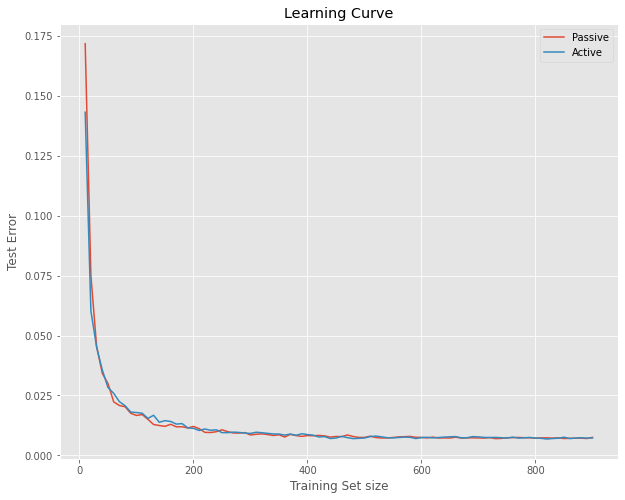

In [ ]:
learning_curve(passive_learning_curve, active_learning_curve)